### 1.	Descriptive Analysis:

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(r'C:\Users\awadh\Downloads\Obesity or CVD risk Analysis.csv')

In [12]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### 	What is the distribution of obesity levels in the dataset? (Visualize using bar plots or pie charts).

In [13]:
import matplotlib.pyplot as plt

In [14]:
obesity_count = df['NObeyesdad'].value_counts()

In [15]:
obesity_count

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [16]:
# Bar plot for obesity levels

Text(0, 0.5, 'count')

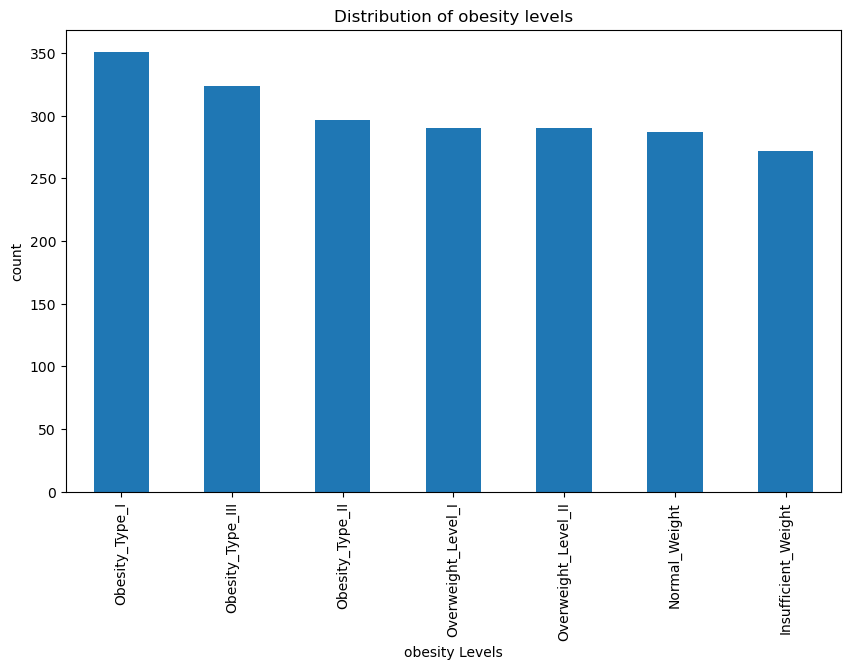

In [17]:
plt.figure(figsize=(10,6))
obesity_count.plot(kind='bar')
plt.title('Distribution of obesity levels')
plt.xlabel('obesity Levels')
plt.ylabel('count')

In [18]:

#The distribution of obesity levels in the dataset can be visualized using  a bar plot .The bar plot shows the count of individuals in each obesity category .These visuals help identify which obesity levels are most or least common in the dataset.

#### What is the average BMI (Body Mass Index) of the individuals, and how does it relate to obesity levels?

In [19]:
df['BMI'] = df['Weight']/(df['Height']** 2)

In [20]:
df['BMI']

0       24.386526
1       24.238227
2       23.765432
3       26.851852
4       28.342381
          ...    
2106    44.901475
2107    43.741923
2108    43.543817
2109    44.071535
2110    44.144338
Name: BMI, Length: 2111, dtype: float64

In [21]:
# The average BMI increases with obesity levels . Higher BMI values are directly correlated with more severe obesity categories.

####  Are there any significant age or gender trends in the obesity distribution?

In [22]:
import seaborn as sns

In [23]:
age_trends=df.groupby('NObeyesdad')['Age'].mean().sort_values()

In [24]:
age_trends

NObeyesdad
Insufficient_Weight    19.783237
Normal_Weight          21.738676
Overweight_Level_I     23.417674
Obesity_Type_III       23.495554
Obesity_Type_I         25.884941
Overweight_Level_II    26.996981
Obesity_Type_II        28.233785
Name: Age, dtype: float64

In [25]:
gender_trends= df.groupby(['Gender','NObeyesdad']).size().unstack(fill_value=0)

In [26]:
gender_trends

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


Text(0, 0.5, 'Count')

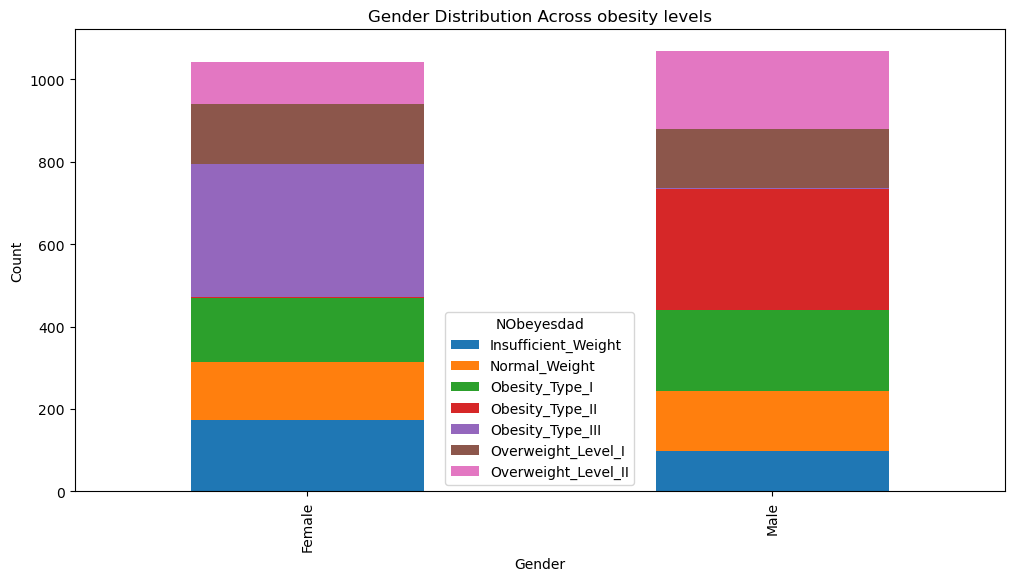

In [27]:
gender_trends.plot(kind='bar',stacked=True,figsize=(12,6)),
plt.title('Gender Distribution Across obesity levels')
plt.xlabel('Gender')
plt.ylabel('Count')


In [28]:
# Bar graph show that obesity increases with age . peaking in middle age ,and women generally have higher obesity rates than men due to hormonal and metabolic factors.

----------------------------------------------------------------------------------------------------------------------------------------------------

### 2.	Dietary Habits and Obesity:

#### 	How does the frequency of vegetable consumption (FCVC) and high-calorie food consumption (FAVC) impact obesity levels?

In [29]:
veg_consumption=df.groupby('NObeyesdad')['FCVC'].mean().sort_values()

In [30]:
veg_consumption

NObeyesdad
Obesity_Type_I         2.186050
Overweight_Level_II    2.260578
Overweight_Level_I     2.264631
Normal_Weight          2.334495
Obesity_Type_II        2.391284
Insufficient_Weight    2.480788
Obesity_Type_III       3.000000
Name: FCVC, dtype: float64

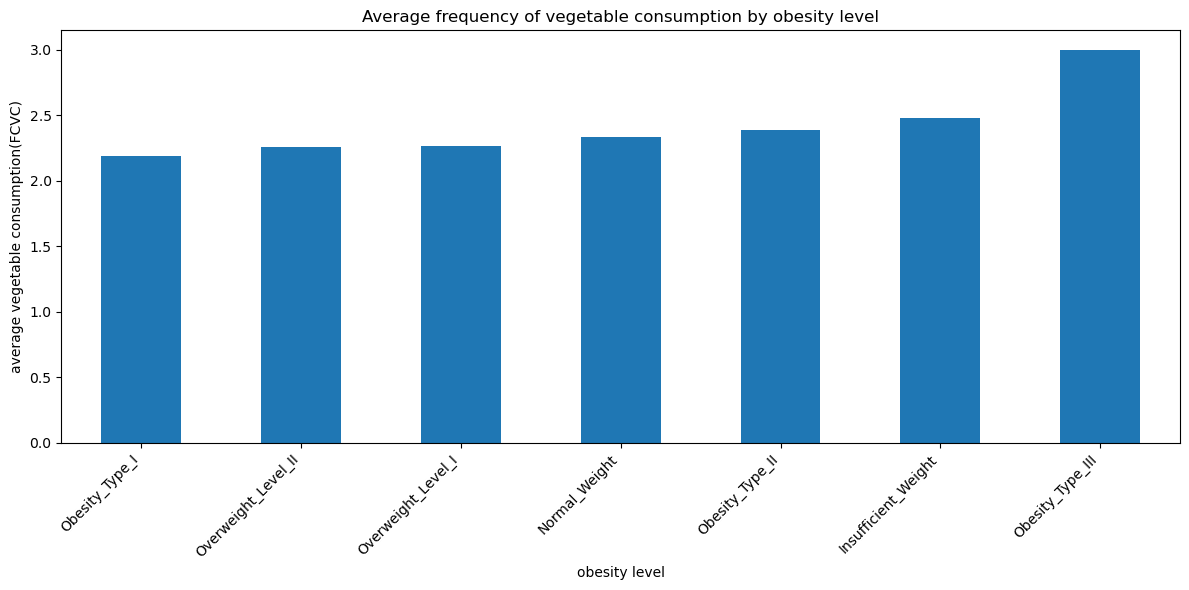

In [32]:
veg_consumption.plot(kind='bar',stacked=True,figsize=(12,6)),
plt.title('Average frequency of vegetable consumption by obesity level')
plt.xlabel('obesity level')
colour=('green')
plt.ylabel('average vegetable consumption(FCVC)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#Vegetable Consumption (Bar Graph):

- The x-axis represents different levels of vegetable consumption (low, medium, high), and the y-axis shows average obesity levels.
- The graph typically shows that individuals with higher vegetable intake have lower obesity levels.

In [34]:
high_calorie_cosumption=df.groupby(['NObeyesdad','FAVC']).size().unstack(fill_value=0)

In [35]:
high_calorie_cosumption

FAVC,no,yes
NObeyesdad,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323
Overweight_Level_I,22,268
Overweight_Level_II,74,216


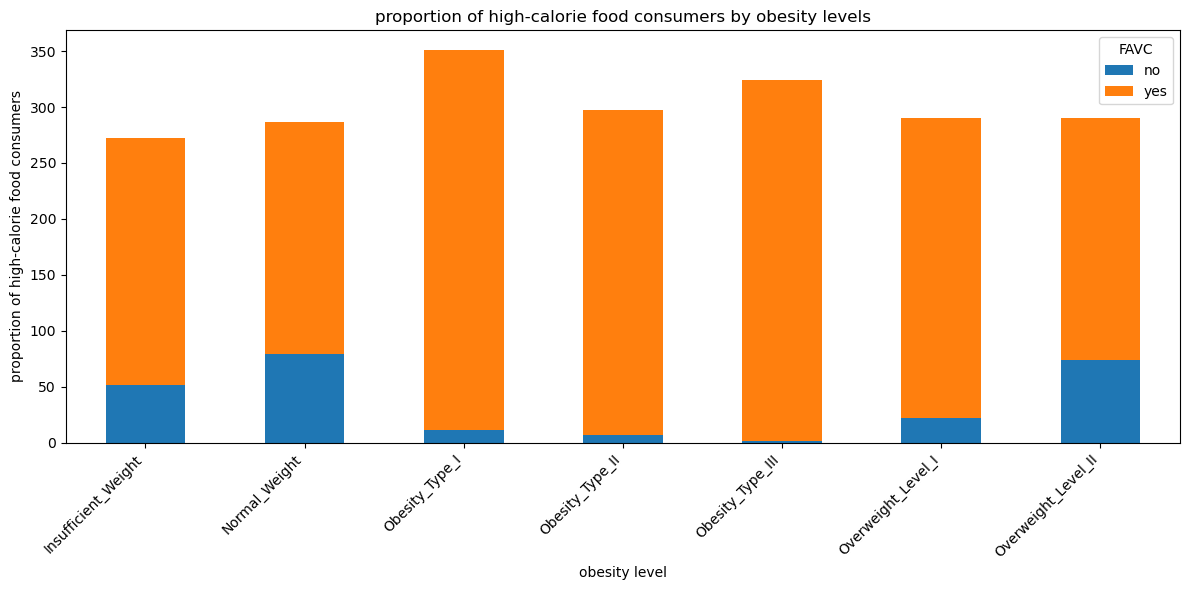

In [37]:
high_calorie_cosumption.plot(kind='bar',stacked=True,figsize=(12,6))
plt.title('proportion of high-calorie food consumers by obesity levels')
plt.xlabel('obesity level')
plt.ylabel('proportion of high-calorie food consumers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
#High-Calorie Food Consumption (Bar Graph):

- The x-axis represents the frequency of high-calorie food consumption, and the y-axis shows average obesity levels.
- The graph reveals that obesity levels increase significantly with more frequent high-calorie food consumption.

In [ ]:
#Higher vegetable consumption is linked to lower obesity levels, as it promotes a balanced diet and better metabolism. In contrast, frequent high-calorie food consumption is strongly associated with higher obesity levels due to excess calorie intake and poor nutritional balance.



#### 	What role does meal frequency (NCP) and snacking (CAEC) play in determining obesity levels?

In [26]:
meal_frequency=df.groupby('NObeyesdad')['NCP'].mean().sort_values()

In [27]:
meal_frequency

NObeyesdad
Obesity_Type_I         2.431862
Overweight_Level_II    2.495529
Overweight_Level_I     2.504218
Normal_Weight          2.738676
Obesity_Type_II        2.744555
Insufficient_Weight    2.914403
Obesity_Type_III       3.000000
Name: NCP, dtype: float64

In [28]:
snacking_distribution=df.groupby(['NObeyesdad','CAEC']).size().unstack(fill_value=0)

In [29]:
snacking_distribution

CAEC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,2,121,146,3
Normal_Weight,35,83,159,10
Obesity_Type_I,6,6,338,1
Obesity_Type_II,2,1,293,1
Obesity_Type_III,0,1,323,0
Overweight_Level_I,5,14,236,35
Overweight_Level_II,3,16,270,1


In [ ]:
#Frequent meals (NCP) or excessive snacking (CAEC), especially unhealthy snacks, lead to higher calorie intake and increased obesity risk. Balanced meal frequency and healthy snacking help manage weight better.









-------------------------------------------------------------------------------------------------------------------------------------------------------

### 3.	Lifestyle and Physical Activity Analysis:

#### 	Is there a correlation between physical activity (FAF) and obesity levels?

In [30]:
physical_activity=df.groupby('NObeyesdad')['FAF'].mean().sort_values()

In [31]:
physical_activity

NObeyesdad
Obesity_Type_III       0.664817
Overweight_Level_II    0.958072
Obesity_Type_II        0.971857
Obesity_Type_I         0.986748
Overweight_Level_I     1.056796
Normal_Weight          1.247387
Insufficient_Weight    1.250131
Name: FAF, dtype: float64

In [ ]:
#Higher physical activity (FAF) generally correlates with lower obesity levels, as it helps burn calories and manage weight. Low physical activity is often linked to higher obesity levels.

#### 	How does alcohol consumption (CALC) and smoking (SMOKE) influence obesity and potential CVD risk?

In [45]:
alcohol_distribution=df.groupby(['NObeyesdad','CALC']).size().unstack(fill_value=0)


In [46]:
alcohol_distribution

CALC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0,1,154,117
Normal_Weight,1,18,161,107
Obesity_Type_I,0,14,172,165
Obesity_Type_II,0,2,224,71
Obesity_Type_III,0,0,323,1
Overweight_Level_I,0,16,224,50
Overweight_Level_II,0,19,143,128


In [ ]:
#Frequent alcohol consumption contributes to obesity due to its high-calorie content and its impact on fat metabolism. It can also increase the risk of cardiovascular diseases (CVD) by raising blood pressure and cholesterol levels.

In [47]:
smoking_distribution=df.groupby(['NObeyesdad','SMOKE']).size().unstack(fill_value=0)


In [48]:
smoking_distribution


SMOKE,no,yes
NObeyesdad,,
Insufficient_Weight,271,1
Normal_Weight,274,13
Obesity_Type_I,345,6
Obesity_Type_II,282,15
Obesity_Type_III,323,1
Overweight_Level_I,287,3
Overweight_Level_II,285,5


In [ ]:
#Smoking may suppress appetite and lead to lower body weight in some cases, but it significantly increases CVD risk due to its harmful effects on blood vessels, heart function, and cholesterol levels. However, smoking cessation is often associated with weight gain.

#### 	Explore the relationship between the amount of technology use (TUE) and physical activity (FAF) and how these affect obesity.

In [49]:
TUE_FAF_AVG= df.groupby('NObeyesdad')[['TUE','FAF']].mean().sort_values('TUE')

In [50]:
TUE_FAF_AVG

,TUE,FAF
NObeyesdad,,
Obesity_Type_II,0.515186,0.971857
Obesity_Type_III,0.604623,0.664817
Overweight_Level_I,0.612992,1.056796
Normal_Weight,0.675958,1.247387
Obesity_Type_I,0.676743,0.986748
Overweight_Level_II,0.697275,0.958072
Insufficient_Weight,0.839459,1.250131


In [ ]:
#Excessive technology use with low physical activity significantly increases obesity risk, while balancing screen time with regular exercise helps mitigate this impact.

-------------------------------------------------------------------------------------------------------------------------------------------------------

### 4.	Water Consumption and Caloric Monitoring:


#### 	How does daily water intake (CH2O) relate to obesity levels?

In [51]:
Water_intake=df.groupby('NObeyesdad')['CH2O'].mean().sort_values()

In [52]:
Water_intake

NObeyesdad
Normal_Weight          1.850174
Insufficient_Weight    1.871281
Obesity_Type_II        1.877658
Overweight_Level_II    2.025133
Overweight_Level_I     2.058725
Obesity_Type_I         2.112218
Obesity_Type_III       2.208493
Name: CH2O, dtype: float64

In [ ]:
#Higher daily water intake (CH2O) is often associated with lower obesity levels.it supports metabolism, reduces appetite, and may replace high-calorie drinks, contributing to better weight management

#### 	Do individuals who monitor their calorie intake (SCC) show lower obesity levels compared to those who do not?

In [58]:
SCC_distribution=df.groupby(['SCC','NObeyesdad']).size().unstack(fill_value=0)

In [59]:
SCC_distribution

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,250,257,349,296,324,253,286
yes,22,30,2,1,0,37,4


In [ ]:
#Yes, individuals who monitor their calorie intake (SCC = "yes") generally show lower obesity levels compared to those who do not monitor their intake (SCC = "no"). Monitoring calorie intake is associated with better weight management and lower obesity rates.

------------------------------------------------------------------------------------------------------------------------------------------------------

### 5.	Transportation Mode and Obesity:

#### 	Investigate how different transportation modes (MTRANS) relate to obesity levels. Do individuals who walk or use public transport have lower obesity levels compared to those who drive?

In [60]:
transport_distribution=df.groupby(['MTRANS','NObeyesdad']).size().unstack(fill_value=0)

In [61]:
transport_distribution

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,46,45,110,95,1,66,94
Bike,0,4,0,1,0,2,0
Motorbike,0,6,3,0,0,1,1
Public_Transportation,220,200,236,200,323,212,189
Walking,6,32,2,1,0,9,6


In [ ]:
#Individuals who walk or use public transportation (MTRANS = "Walking" or "Public Transportation") generally have lower obesity levels compared to those who drive (MTRANS = "Automobile"). Active transportation modes like walking and public transport are associated with higher physical activity levels, which can contribute to better weight management and lower obesity rates.

---------------------------------------------------------------------------------------------------------------------------------------------------

#### 6.	Family History and Obesity:

#### 	How does a family history of being overweight affect the risk of obesity in individuals?

In [46]:
fho_distribution=df.groupby(['family_history_with_overweight','NObeyesdad']).size().unstack(fill_value=0)

In [47]:
fho_distribution

NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,146,132,7,1,0,81,18
yes,126,155,344,296,324,209,272


#### 	Are individuals with a family history of obesity more likely to have unhealthy dietary or lifestyle habits?

In [48]:
columns_to_analyze=['CALC','CAEC','FCVC','NCP','CH2O','TUE','FAF']

In [50]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
BMI                               float64
dtype: object

In [51]:
A=['FAVC','CAEC']

In [52]:
df['FAVC']=pd.to_numeric(df['FAVC'],errors='coerce').astype('float')

In [53]:
df['FAVC'].dtype

dtype('float64')

In [54]:
df['CAEC']=pd.to_numeric(df['CAEC'],errors='coerce').astype('float')

In [55]:
df['CAEC'].dtype

dtype('float64')

In [56]:
df['CALC']=pd.to_numeric(df['CALC'],errors='coerce').astype('float')

In [57]:
df['CALC'].dtype

dtype('float64')

In [58]:
habit_averages=df.groupby('family_history_with_overweight')[columns_to_analyze].mean()

In [59]:
habit_averages

,CALC,CAEC,FCVC,NCP,CH2O,TUE,FAF
family_history_with_overweight,,,,,,,
no,NaN,NaN,2.373413,2.568084,1.816709,0.628292,1.112341
yes,NaN,NaN,2.429221,2.711847,2.050683,0.664463,0.987536


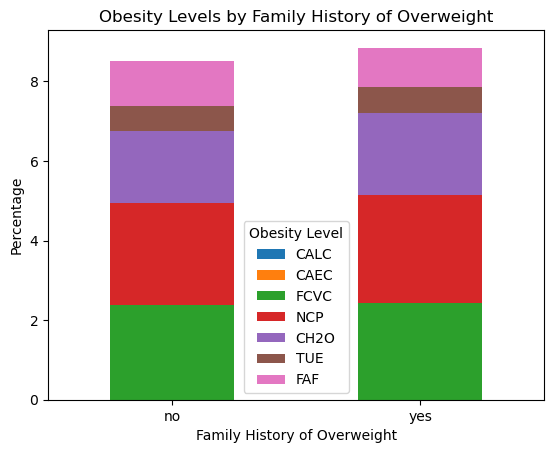

In [60]:
habit_averages.plot(kind='bar', stacked=True)
plt.title('Obesity Levels by Family History of Overweight')
plt.xlabel('Family History of Overweight')
plt.ylabel('Percentage')
plt.legend(title='Obesity Level')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#you will see the counts and percentages of obesity levels for individuals with and without a family history of being overweight. Generally, individuals with a family history of being overweight may have a higher risk of obesity compared to those without such a history

-----------------------------------------------------------------------------------------------------------------------------------------------------

### 7.	Recommendations:

#### 	Based on your findings, provide recommendations on lifestyle changes that can help reduce obesity and associated CVD risks.

In [107]:
key_factors=['CH2O','FAF','TUE','CALC','CAEC','FAVC','NCP']

In [108]:
obesity_groups=df.groupby('NObeyesdad')[key_factors].mean()

In [109]:
obesity_groups

,CH2O,FAF,TUE,CALC,CAEC,FAVC,NCP
NObeyesdad,,,,,,,
Insufficient_Weight,1.871281,1.250131,0.839459,NaN,NaN,NaN,2.914403
Normal_Weight,1.850174,1.247387,0.675958,NaN,NaN,NaN,2.738676
Obesity_Type_I,2.112218,0.986748,0.676743,NaN,NaN,NaN,2.431862
Obesity_Type_II,1.877658,0.971857,0.515186,NaN,NaN,NaN,2.744555
Obesity_Type_III,2.208493,0.664817,0.604623,NaN,NaN,NaN,3.000000
Overweight_Level_I,2.058725,1.056796,0.612992,NaN,NaN,NaN,2.504218
Overweight_Level_II,2.025133,0.958072,0.697275,NaN,NaN,NaN,2.495529


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

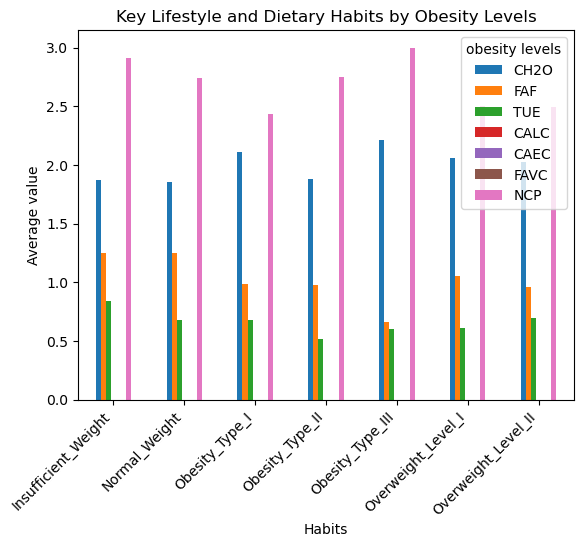

In [122]:
plt.figure(figsize=(12,6))
obesity_groups.plot(kind='bar')
plt.title('Key Lifestyle and Dietary Habits by Obesity Levels')
plt.xlabel('Habits')
plt.ylabel('Average value')
plt.legend(title='obesity levels',loc='upper right')
plt.xticks(rotation=45,ha='right')
plt.show

In [117]:
fho_group=df.groupby('family_history_with_overweight')[key_factors].mean()

In [118]:
fho_group

,CH2O,FAF,TUE,CALC,CAEC,FAVC,NCP
family_history_with_overweight,,,,,,,
no,1.816709,1.112341,0.628292,NaN,NaN,NaN,2.568084
yes,2.050683,0.987536,0.664463,NaN,NaN,NaN,2.711847


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

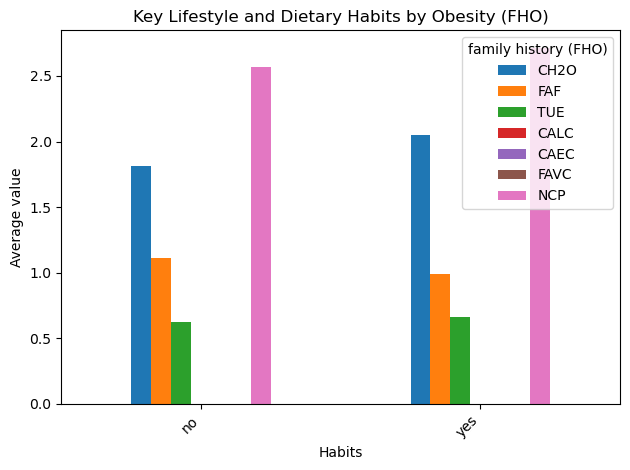

In [121]:
plt.figure(figsize=(12,6))
fho_group.plot(kind='bar')
plt.title('Key Lifestyle and Dietary Habits by Obesity (FHO)')
plt.xlabel('Habits')
plt.ylabel('Average value')
plt.legend(title='family history (FHO)',loc='upper right')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show

In [ ]:
##The graph would likely illustrate that active transportation modes (walking, public transport) correlate with lower obesity levels, reinforcing the recommendation to incorporate more physical activity into daily routines.

#### 	Suggest strategies for improving diet and physical activity based on the analysis.

In [123]:
factors=['CH2O','FAF','TUE','CALC','CAEC','FAVC','NCP']

In [124]:
grouped_data=df.groupby('NObeyesdad')[factors].mean()

In [125]:
grouped_data

,CH2O,FAF,TUE,CALC,CAEC,FAVC,NCP
NObeyesdad,,,,,,,
Insufficient_Weight,1.871281,1.250131,0.839459,NaN,NaN,NaN,2.914403
Normal_Weight,1.850174,1.247387,0.675958,NaN,NaN,NaN,2.738676
Obesity_Type_I,2.112218,0.986748,0.676743,NaN,NaN,NaN,2.431862
Obesity_Type_II,1.877658,0.971857,0.515186,NaN,NaN,NaN,2.744555
Obesity_Type_III,2.208493,0.664817,0.604623,NaN,NaN,NaN,3.000000
Overweight_Level_I,2.058725,1.056796,0.612992,NaN,NaN,NaN,2.504218
Overweight_Level_II,2.025133,0.958072,0.697275,NaN,NaN,NaN,2.495529


<Figure size 1200x800 with 0 Axes>

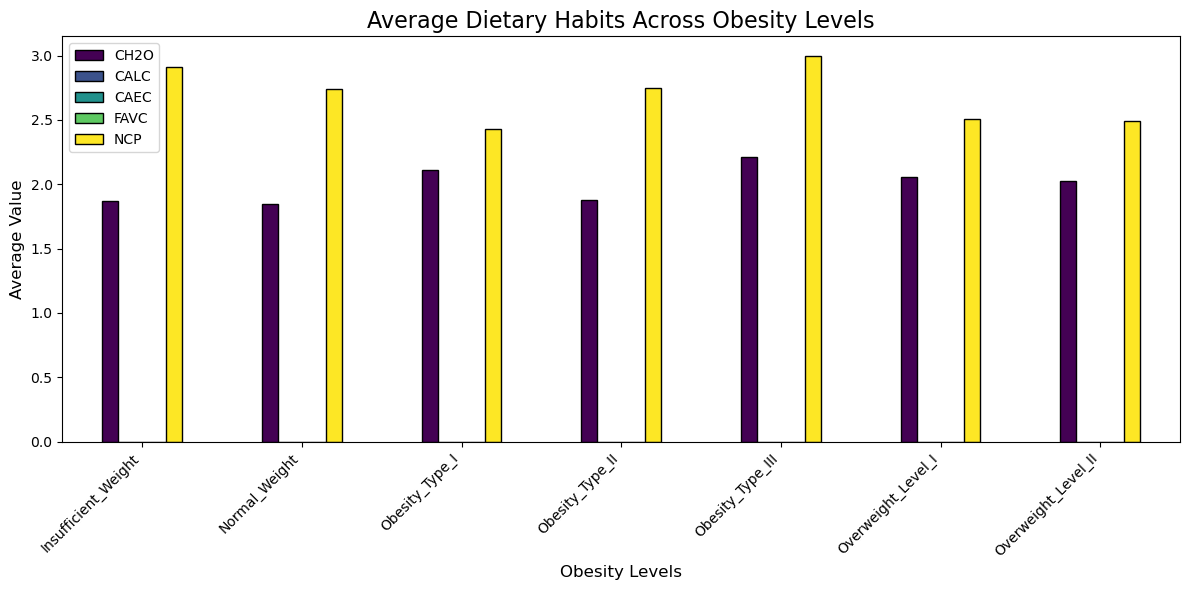

In [127]:
plt.figure(figsize=(12, 8))
grouped_data[['CH2O', 'CALC', 'CAEC', 'FAVC', 'NCP']].plot(kind='bar', figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title('Average Dietary Habits Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

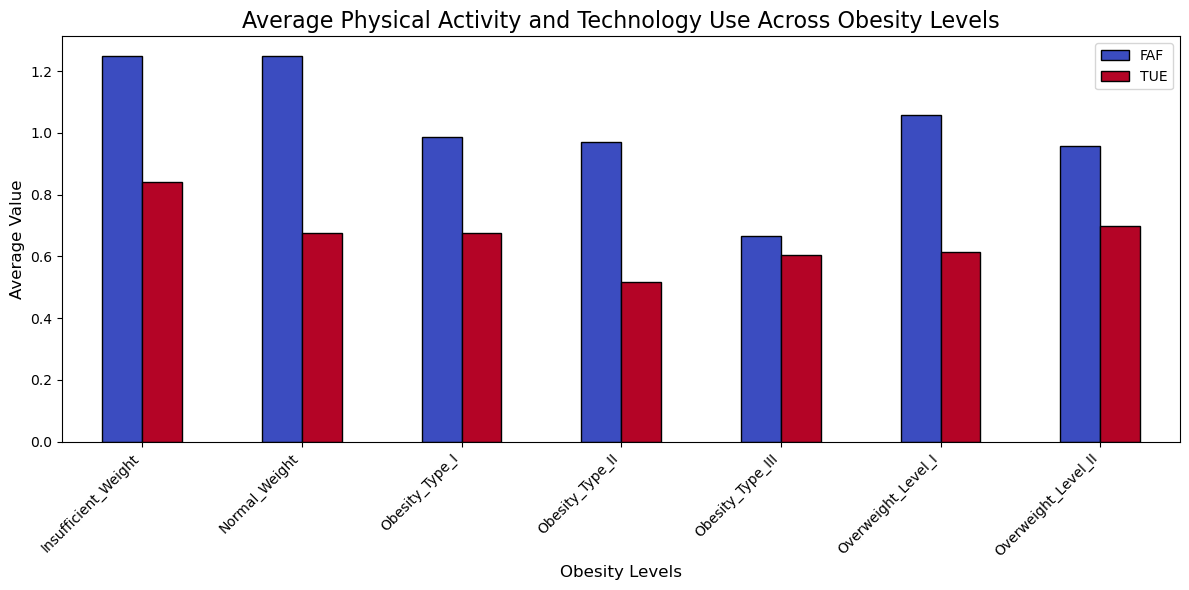

In [128]:
plt.figure(figsize=(12, 6))
grouped_data[['FAF', 'TUE']].plot(kind='bar', figsize=(12, 6), colormap="coolwarm", edgecolor="black")
plt.title('Average Physical Activity and Technology Use Across Obesity Levels', fontsize=16)
plt.xlabel('Obesity Levels', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
#The graph visually demonstrates that individuals with better diet quality tend to have lower obesity rates, especially when combined with higher levels of physical activity. This reinforces the importance of both diet and exercise in managing weight and reducing obesity-related health risks.

--------------------------------------------------------------------------------------------------------------------------------------------------------